# Большое ДЗ №1

Выполните задания, указанные в конце ноутбука. Критерий зачета ДЗ - не менее 70% набранных баллов (балы указаны в каждом задании).

# Загрузим датасет - зарплаты IT специалистов в Европе за 2020 год

In [ ]:
# Importing libaries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
path_to_data = 'https://raw.githubusercontent.com/ddvika/DS_2021/main/lecture_1/data/IT_EU_2020.csv'
df_2020 = pd.read_csv(path_to_data)
df_2020.head()

In [ ]:
# look at an example of a messy "numerical" columns
df_2020['Number of vacation days'].value_counts()

In [ ]:
np.unique(df_2020['Number of vacation days'].dropna())

array(['(no idea)', '0', '1', '10', '12', '14', '15', '16', '20', '21',
       '22', '23', '23+', '24', '24 labour days', '25', '26', '27', '28',
       '29', '3', '30', '30 in contract (but theoretically unlimited)',
       '31', '32', '33', '34', '35', '36', '365', '37', '37.5', '38',
       '39', '40', '45', '5', '50', '60', '99', 'Unlimited', 'Unlimited ',
       'unlimited', 'unlimited ', '~25'], dtype=object)

In [ ]:
# Выведем размер датасета
df_2020.shape

(1253, 23)

In [ ]:
# show all columns
print(df_2020.columns)

In [ ]:
# rename columns
df_2020.rename(columns = {'Position ':'Position'}, inplace = True)

In [ ]:
# Проверим NaN значения
df_2020.isna().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [ ]:
df_2020.describe()

Age  ...  Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week
count  1226.000000  ...                                         373.000000                                                
mean     32.509788  ...                                          12.967828                                                
std       5.663804  ...                                          15.275174                                                
min      20.000000  ...                                           0.000000                                                
25%      29.000000  ...                                           0.000000                                                
50%      32.000000  ...                                           0.000000                                                
75%      35.000000  ...                                          30.000000                                                
max      69.000000  ...                                          40.000000                                                

[8 rows x 4 columns]

**Вопрос:** Почему вывелась статистика не по всем колонкам?

In [ ]:
# categorical features
features_cat = ['Gender', 'City', 'Position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Number of vacation days',
       'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

In [ ]:
# numeric features
features_num = ['Age',
                'Yearly brutto salary (without bonus and stocks) in EUR',
                'Yearly bonus + stocks in EUR']

In [ ]:
# features we ignore in the following
features_not_used = ['Timestamp',
                     'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
                     'Annual bonus+stocks one year ago. Only answer if staying in same country',
                     'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

In [ ]:
# check if we have captured all features
len(features_cat + features_num + features_not_used) - len(df_2020.columns)

0

## Очистка данных

In [ ]:
# fill missing values

# categorical features
missing_text = '_MISSING_'
df_2020[features_cat] = df_2020[features_cat].fillna(missing_text)

# numerical features
missing_num = -1
df_2020[features_num] = df_2020[features_num].fillna(missing_num)

## Посмотрим простые статистики

1. Возраст людей

In [ ]:
%matplotlib inline

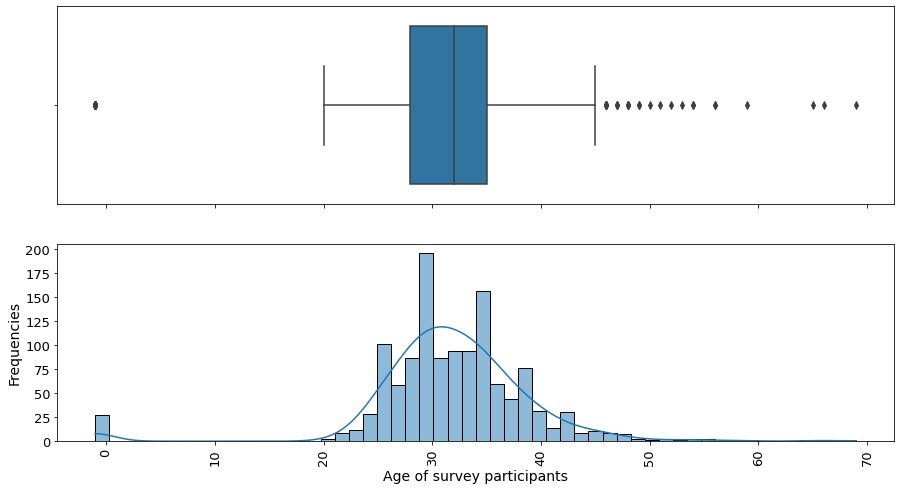

In [ ]:
# Age of survey participants distribution
fig, (ax_box,ax_hist) = plt.subplots(2, sharex=True,figsize=(15,8))

sns.boxplot(data=df_2020,x='Age',ax=ax_box)
ax_box.set(xlabel="")


sns.histplot(data=df_2020,x='Age',kde=True,ax=ax_hist)
plt.xticks(fontsize=13,rotation=90)
plt.xlabel("Age of survey participants",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Frequencies",fontsize=14)
plt.show()

Используем другой тип графика

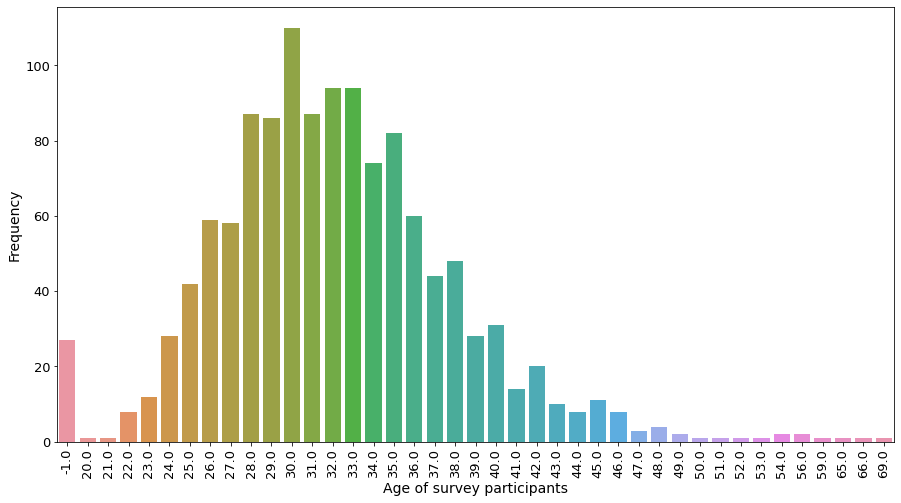

In [ ]:
# count plot
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df_2020,x='Age')



plt.xticks(fontsize=13,rotation=90)
plt.xlabel("Age of survey participants",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Frequency",fontsize=14)
plt.show()

2. Посмотрим какие города встречаются в датасете

In [ ]:
current_feature = 'City'
# show all levels
print(np.unique(df_2020[current_feature]))

['Aachen' 'Amsterdam' 'Ansbach' 'Barcelona' 'Basel' 'Berlin' 'Bielefeld'
 'Bodensee' 'Boeblingen' 'Bonn' 'Braunschweig ' 'Brunswick' 'Brussels'
 'Brussels ' 'Bucharest' 'Bölingen' 'Cambridge' 'City in Russia' 'Cologne'
 'Copenhagen' 'Cracovia' 'Cracow' 'Cupertino' 'Darmstadt' 'Den Haag'
 'Dortmund' 'Dresden' 'Dublin' 'Dublin ' 'Duesseldorf' 'Dusseldorf'
 'Dusseldurf' 'Düsseldorf' 'Düsseldorf ' 'Eindhoven' 'Erlangen' 'Fr'
 'France' 'Frankfurt' 'Friedrichshafen' 'Hamburg' 'Hannover' 'Heidelberg'
 'Heidelberg ' 'Heilbronn' 'Helsinki' 'Hildesheim' 'Hildesheim '
 'Ingolstadt' 'Ingolstadt ' 'Innsbruck' 'Istanbul' 'Jena' 'Karlsruhe'
 'Karlsruhe ' 'Kempten' 'Kiev' 'Koblenz' 'Konstanz' 'Konstanz area'
 'Krakow' 'Kyiv' 'Köln' 'Leipzig' 'Lisbon' 'London' 'Luttich' 'Lübeck'
 'Madrid' 'Malta' 'Mannheim' 'Mannheim ' 'Marseille' 'Milan' 'Milano'
 'Minsk' 'Moldova' 'Moscow' 'Munich' 'Murnau am Staffelsee ' 'Münster'
 'NJ, USA' 'Nuremberg' 'Nuremberg ' 'Nürnberg' 'Paderborn' 'Paris'
 'Prague' 'Prefer n

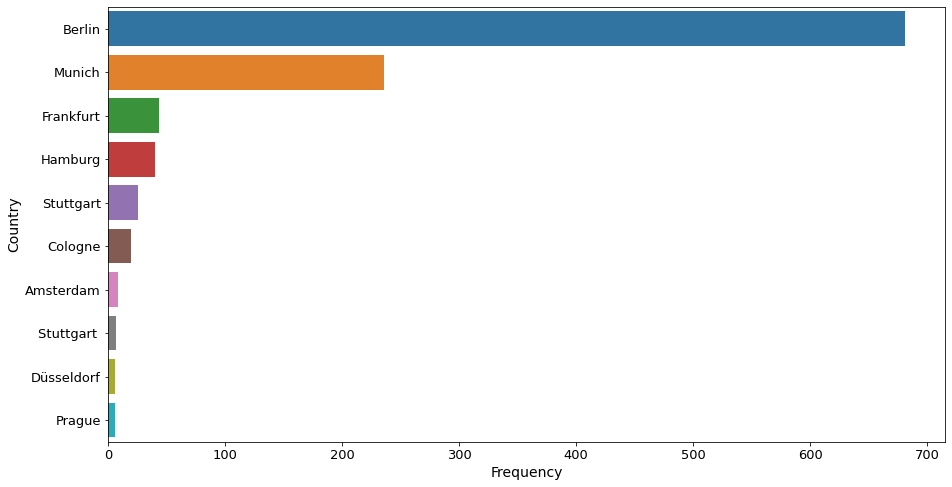

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_2020['City'].value_counts().head(10).reset_index(),
        y='index',x='City')
plt.xticks(fontsize=13)
plt.xlabel("Frequency",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Country",fontsize=14)
plt.show()

## Рассмотрим самый интересный параметр - **Yearly brutto salary (without bonus and stocks) in EUR**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


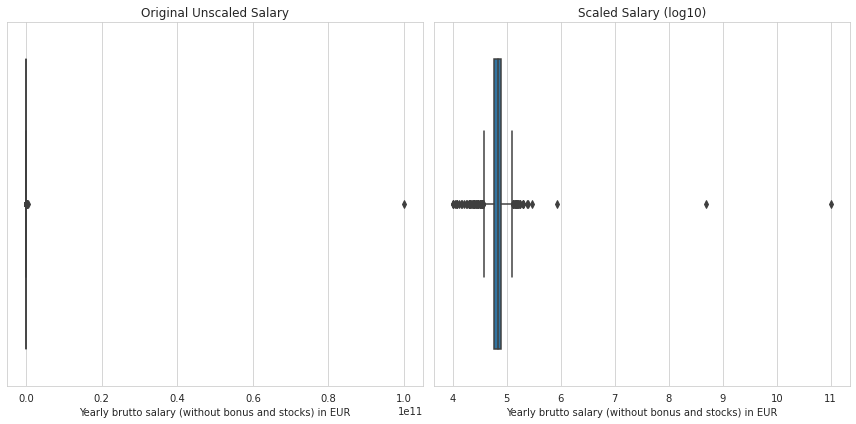

In [ ]:
interested_feature = df_2020['Yearly brutto salary (without bonus and stocks) in EUR']

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))

# Original Data
plt.subplot(1,2,1)
sns.boxplot(interested_feature)
plt.title("Original Unscaled Salary")

# After Scaling down using Logarithms
plt.subplot(1,2,2)
sns.boxplot(np.log10(interested_feature))
plt.title("Scaled Salary (log10)")

plt.tight_layout()
plt.show()

**Вопрос:** Почему ничего не понятно на графиках?

In [ ]:
# Removing Outlier using IQR

feature = 'Yearly brutto salary (without bonus and stocks) in EUR'

p25 = df_2020[feature].quantile(0.25) 
p75 = df_2020[feature].quantile(0.75) 
iqr = p75 - p25 

upper_limit = p75 + 1.5 * iqr 
lower_limit = p25 - 1.5 * iqr 

# New DataFrame after removing the outlier 
new_df = df_2020[(df_2020[feature] > lower_limit) & (df_2020[feature] < upper_limit)].copy()

# Checking the difference
diff = df_2020.shape[0] - new_df.shape[0] 

diff

82

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


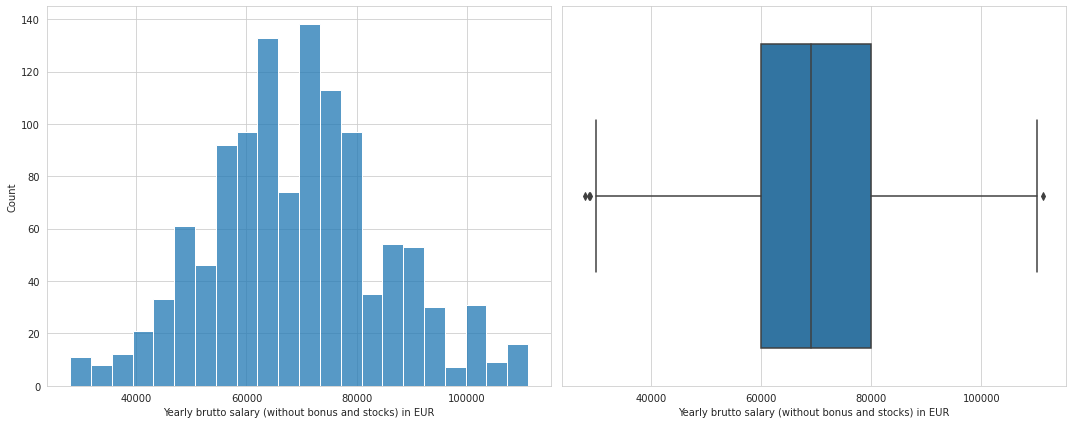

In [ ]:
# Distribution after removing outlier from the dataset

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

sns.histplot(new_df[feature], ax=ax1)
sns.boxplot(new_df[feature],ax=ax2)

plt.tight_layout()
plt.show()

## Связи между фичами

In [ ]:
# Exploring the Gender Column
feature = 'Gender'
new_df[feature].unique()

array(['Male', 'Female', '_MISSING_'], dtype=object)

In [ ]:
# Replacing the NaN value with string "Not Specified"
new_df[feature].unique()

array(['Male', 'Female', '_MISSING_'], dtype=object)

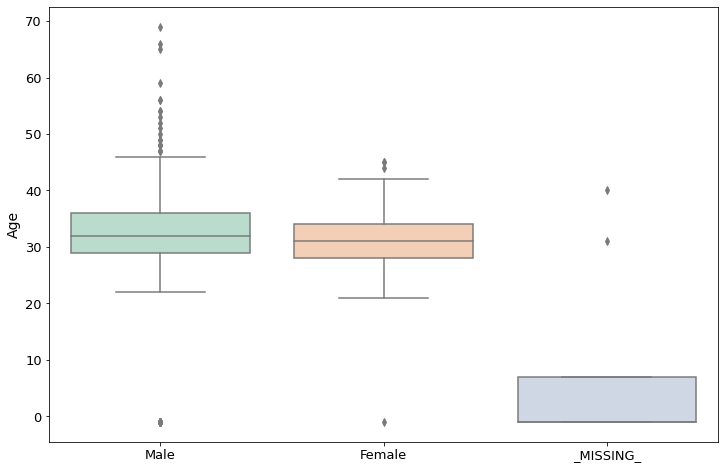

In [ ]:
# Plotting the Boxplots
plt.figure(figsize=(12,8))
sns.boxplot(x='Gender',y='Age',data=new_df,palette='Pastel2')
plt.xticks(fontsize=13)
plt.xlabel("")
plt.yticks(fontsize=13)
plt.ylabel("Age",fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:154: UserWarning: The handle <matplotlib.patches.Patch object at 0x7fa784cf2310> has a label of '_MISSING_' which cannot be automatically added to the legend.
  ax_obj.legend(handles, labels, title=self.variables["hue"], **legend_kws)


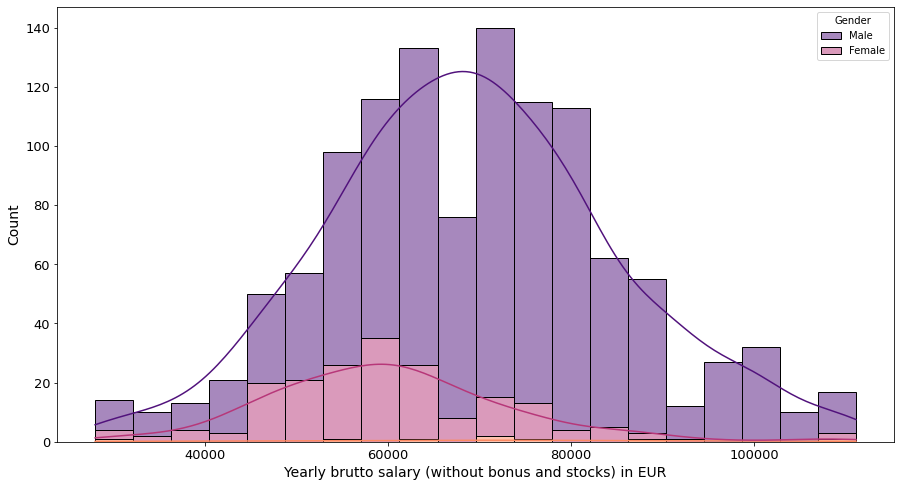

In [ ]:
# Distribution of Yearly Salaries 
plt.figure(figsize=(15,8))
sns.histplot(x='Yearly brutto salary (without bonus and stocks) in EUR',data=new_df,
             bins=20, kde=True, hue='Gender',multiple="stack",palette='magma')
plt.xticks(fontsize=13)
plt.xlabel("Yearly brutto salary (without bonus and stocks) in EUR",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Count",fontsize=14)
plt.show()

In [ ]:
new_df.rename(columns = {'Position ':'Position'}, inplace = True)

## Рассмотрим должности

In [ ]:
new_df['Position'].value_counts()

Software Engineer                               365
Backend Developer                               161
Data Scientist                                  102
Frontend Developer                               86
QA Engineer                                      69
                                               ... 
Fullstack engineer, ну или Software engineer      1
Full-Stack Developer                              1
Marketing Analyst                                 1
Data Center Manager                               1
Graphic Designer                                  1
Name: Position, Length: 134, dtype: int64

Отобразим кол-во позиций

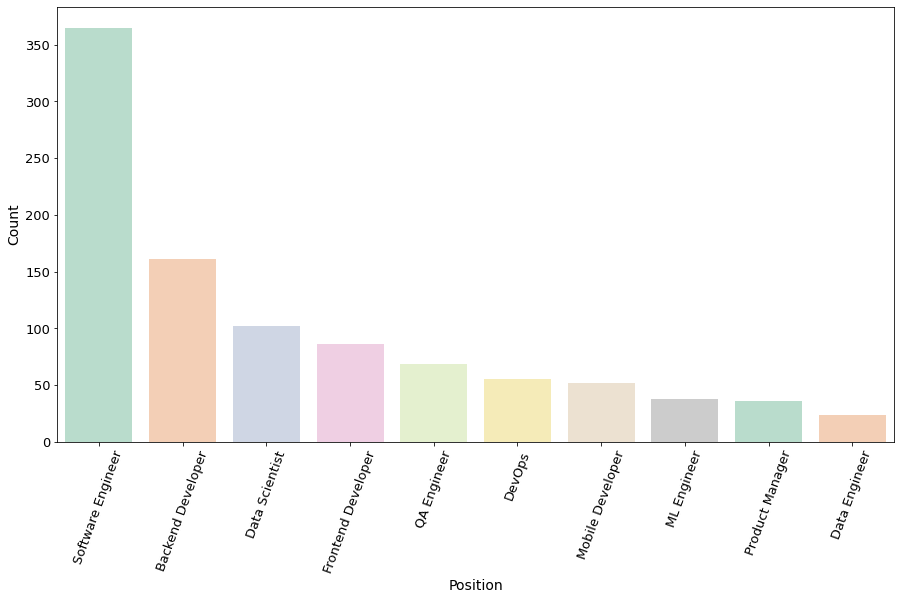

In [ ]:
# Plotting the distribution - number of Positon
plt.figure(figsize=(15,8))
sns.countplot(data=new_df,x='Position',
              order=new_df['Position'].value_counts().iloc[:10].index,
              palette='Pastel2')
plt.xticks(rotation=70,fontsize=13)
plt.xlabel("Position",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Count",fontsize=14)
plt.show()

In [ ]:
position_earning = new_df['Yearly brutto salary (without bonus and stocks) in EUR'].groupby(new_df['Position']).sum()
position_earning.sort_values(ascending=False,inplace=True)
position_earning.head(10)

Position
Software Engineer     26047284.0
Backend Developer     11283523.0
Data Scientist         6811400.0
Frontend Developer     5609155.0
QA Engineer            4240300.0
DevOps                 4006800.0
Mobile Developer       3512400.0
ML Engineer            2554000.0
Product Manager        2454510.0
Data Engineer          1666500.0
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64

In [ ]:
top_position = position_earning.iloc[:10].index.to_list()
avr_earning = (position_earning/ new_df['Position'].value_counts()).sort_values(ascending = False)

for position in top_position:
    print(position,": ",round(avr_earning[position],2))

Software Engineer :  71362.42
Backend Developer :  70083.99
Data Scientist :  66778.43
Frontend Developer :  65222.73
QA Engineer :  61453.62
DevOps :  72850.91
Mobile Developer :  67546.15
ML Engineer :  67210.53
Product Manager :  68180.83
Data Engineer :  69437.5


# Задание 1 (1 балл)
Рассчитайте корреляцию Пирсона для каждого численного признака с целевой переменной (целевая переменная -'Yearly brutto salary (without bonus and stocks) in EUR')

In [ ]:
corr_data = new_df.corr()['Yearly brutto salary (without bonus and stocks) in EUR'].sort_values()

# Print the most negative correlations
print(corr_data.head(15), '\n')

# Print the most positive correlations
print(corr_data.tail(15))

Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week          -0.017333
Age                                                                                                         0.176961
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country    0.494505
Yearly brutto salary (without bonus and stocks) in EUR                                                      1.000000
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64 

Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week          -0.017333
Age                                                                                                         0.176961
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country    0.494505
Yearly brutto salary (without bonus and stocks) in EUR                                                

# Задание 2 (1 балл)
Изучите данные при помощи метода ProfileReport из библиотеки pandas_profiling, установите следующие атрибуты для  ProfileReport: explorative=True, minimal=False.

Если работаете в колабе, то обязательно увыполните следующую команду (в пустой ячейке и перезапустите среду в ноутбуке ("Среда выполнения" -> "Перезапустить среду выполнения")
```
!pip3 install pandas-profiling==3.1.0
```

In [ ]:
!pip3 install pandas-profiling==3.1.0

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
new_df.profile_report(explorative=True, minimal=False)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Задание 3 (1 балл)
Сделайте краткий вывод по данным, основываясь на отчете ProfileReport. Какие основные проблемы в данных?

По фичам ("Gender", "City", "Employment status","Сontract duration", "Main language at work", "Have you lost your job due to the coronavirus outbreak?" ) имеется явный перекос данных в сторону одного из значений.

Фичи "Your main technology / programming language" и "Other technologies/programming languages you use often" содержат несистематезированные значения и требуют дополнительной обработки.

Фича "Annual bonus+stocks one year ago. Only answer if staying in same country"  и "Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week" не содежат данные больше чем в половине значений.

# Задание 4 (1 балл)
Расчитайте матрицу корреляций признаков. Используйте метод corr() из библиотеки pandas, а для визуализации - heatmap из библиотеки seaborn (см. пример в ноутбуке с занятия: https://colab.research.google.com/drive/1niWhG85phDcW3CToyT0ttWbZnnUnsbxW)

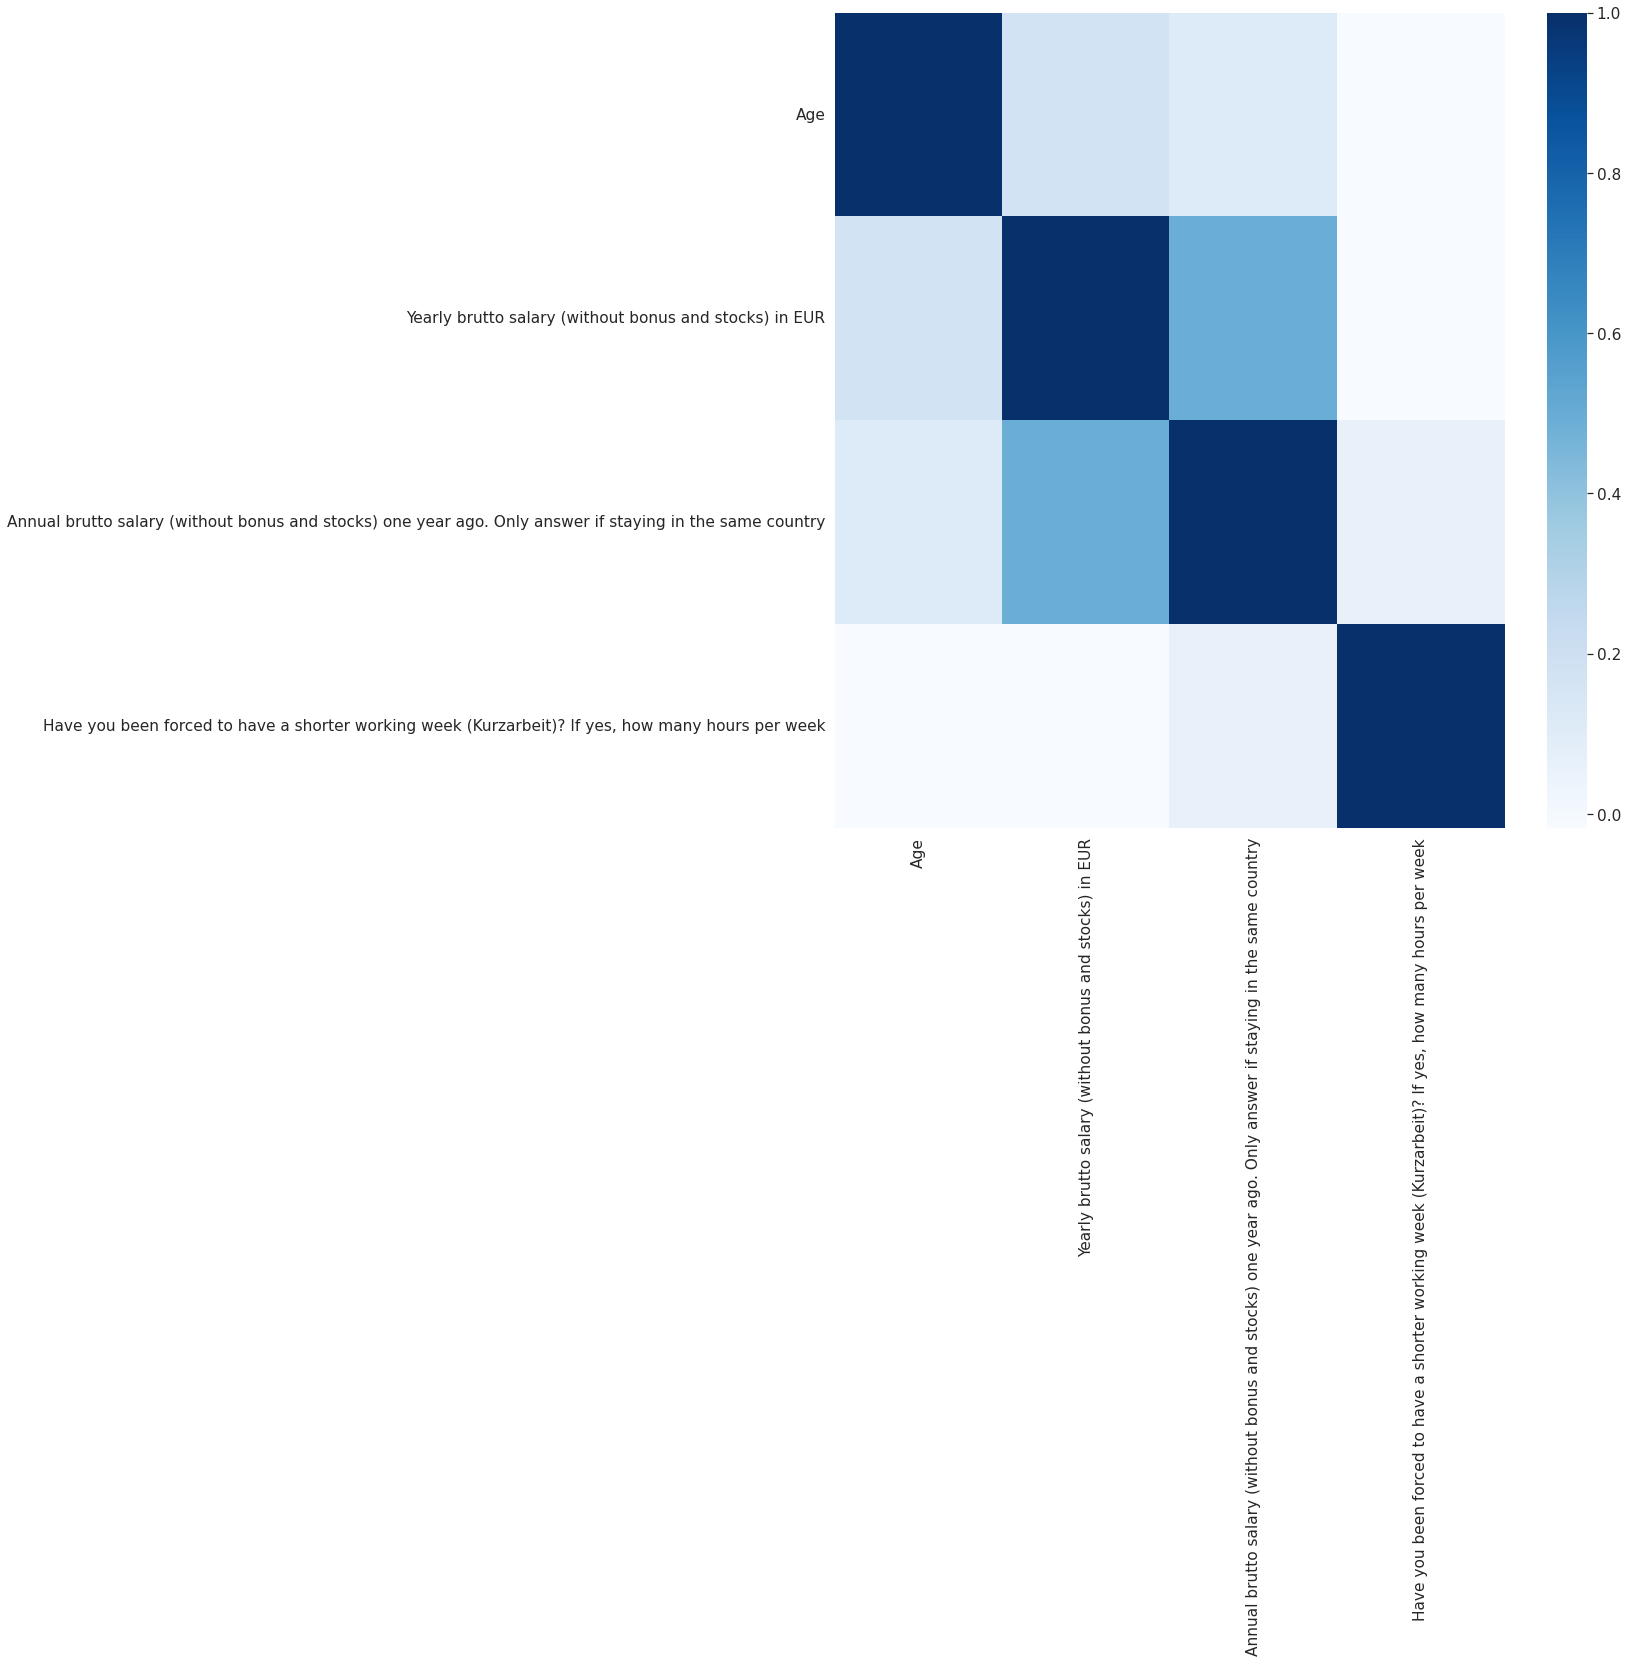

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize=(15,15))
sns.heatmap(new_df.corr(),cbar=True,cmap='Blues')

# Задание 5 (1.5 балла)

Закодируйте категориальные признаки. Можете использовать любой кодировщик категориальных данных, например: `sklearn.preprocessing.LabelEncoder`,`sklearn.preprocessing.OrdinalEncoder` или`sklearn.preprocessing.OneHotEncoder`.

In [ ]:
numeric_subset = new_df.select_dtypes('number')
features_alter = new_df.copy()
categorical_subset = new_df[['Gender', 'Seniority level','Company size']]
categorical_subset = pd.get_dummies(categorical_subset)
features_alter = pd.concat([numeric_subset, categorical_subset], axis = 1)
features_alter.shape

(1171, 30)

In [ ]:
# categorical features
features_cat_2 = ['Gender', 'City', 'Position',
       'Total years of experience', 
       'Seniority level', 'Your main technology / programming language',
       'Number of vacation days', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
features_2 = new_df.copy()
enc = OrdinalEncoder()
features_2[features_cat_2] = enc.fit_transform(features_2[features_cat_2])


In [ ]:
features_2.rename(columns = {'Yearly brutto salary (without bonus and stocks) in EUR':
                             'Yearly brutto salary'}, inplace = True)
features_2.rename(columns = {'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country':
                             'Annual brutto salary'}, inplace = True)
features_2.rename(columns = {'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week':
                             'Some questions'}, inplace = True)

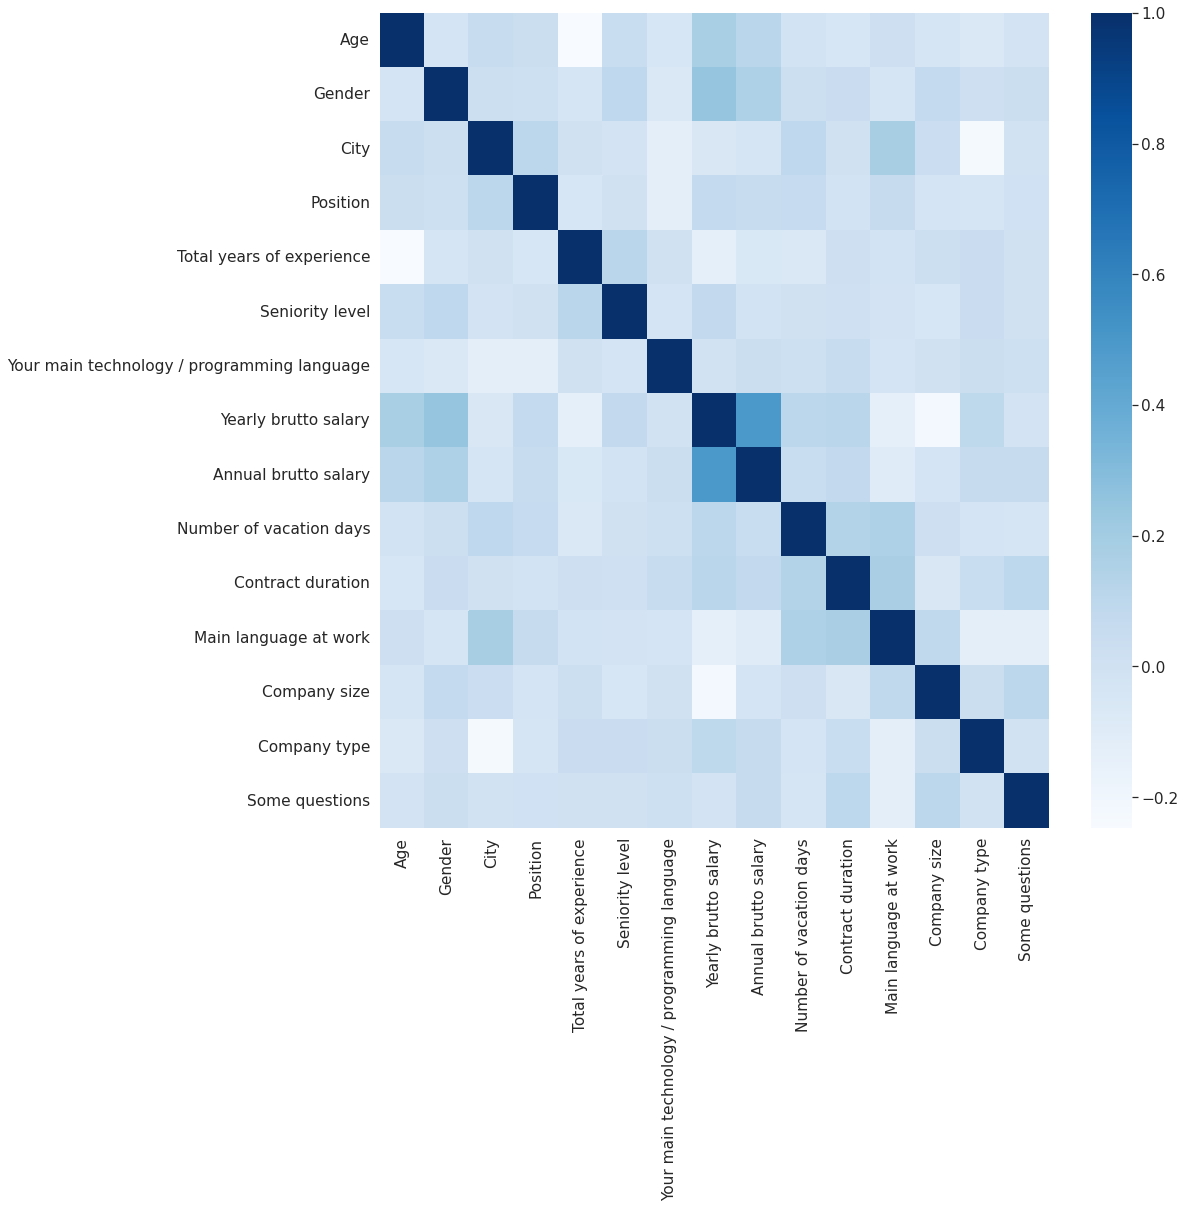

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize=(15,15))
sns.heatmap(features_2.corr(),cbar=True,cmap='Blues')

# Задание 6 (1.5 балла)
После кодирования категориальных признаков в числовые - еще раз рассчитайте и отобразите матрицу корреляций. Удалите фичи, у которых корреляция >0.6 или (<-0.6). Не забывайте что отрицательная корреляция - тоже мера зависимости!

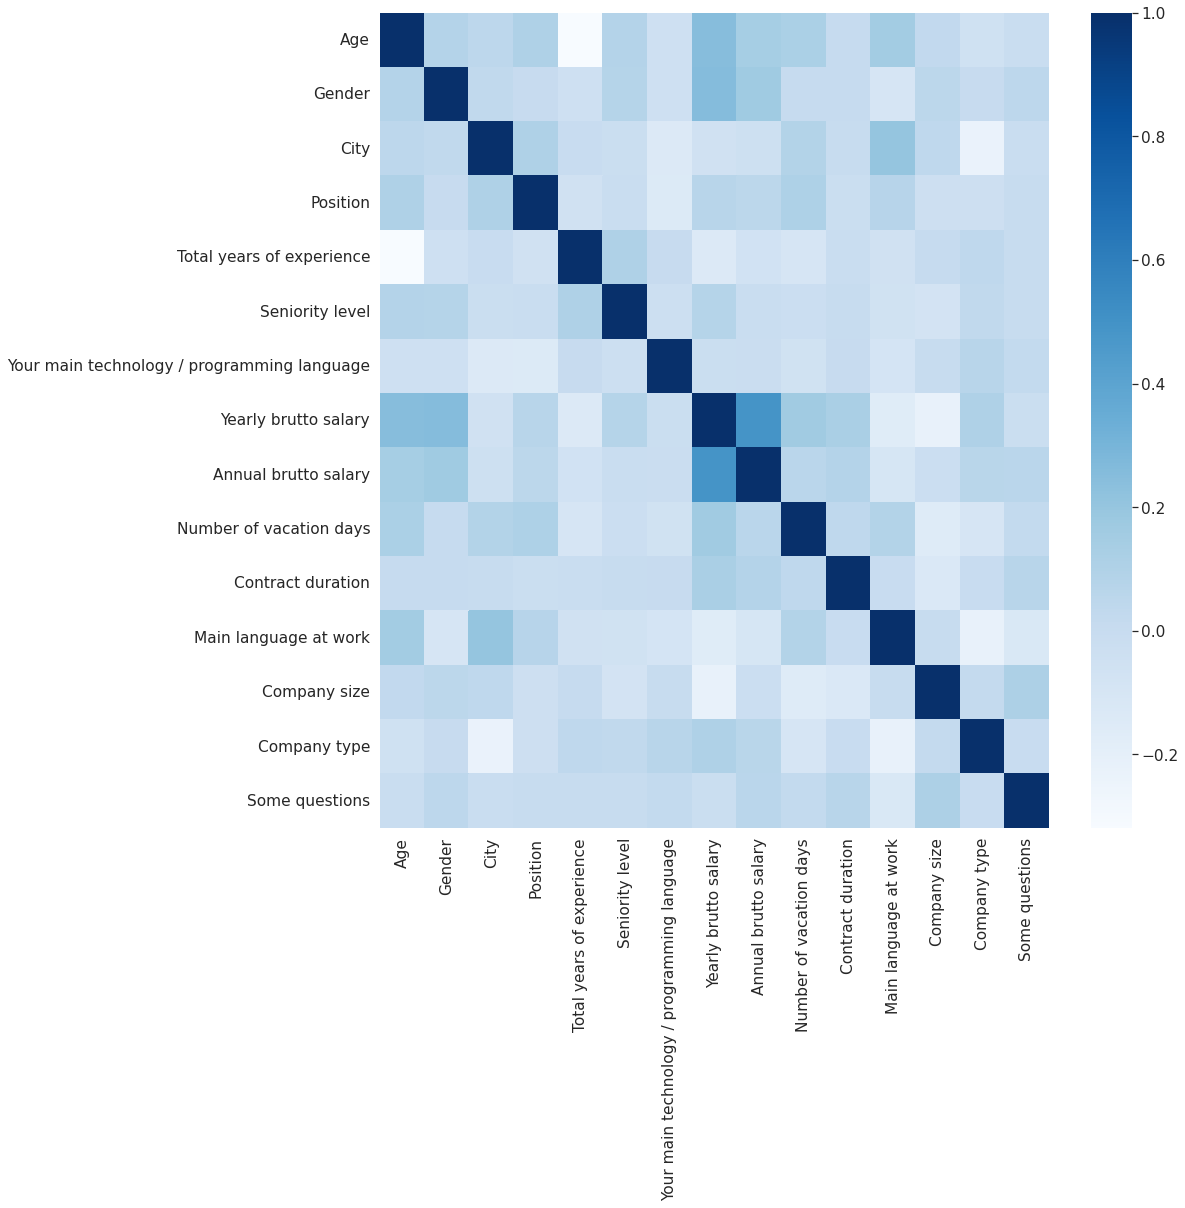

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize=(15,15))
sns.heatmap(features_2.corr(),cbar=True,cmap='Blues')

In [ ]:
def remove_collinear_features(x, threshold):
   
    # Dont want to remove correlations between Energy Star Score
    y = x['Yearly brutto salary']
    x = x.drop(columns = ['Yearly brutto salary'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    #x = x.drop(columns = ['Annual brutto salary', 'Some questions'])
    
    # Add the score back in to the data
    x['Yearly brutto salary'] = y
               
    return x

In [ ]:
remove_collinear_features(features_2,0.6)

# Задание 7 (1.5 балла)
Приведите пример распределения признака с выбросами (можете привести любой из выборки, кроме указанного выше в ноутбуке). Удалите выбросы с использованием правила "68-95-99.7", то есть оставьте те значения, которые попадают в диапазон: среднее значение +- 3 стандартных отклонения. Пример реализации можно посмотреть в ноутбуке с занятия: https://colab.research.google.com/drive/1niWhG85phDcW3CToyT0ttWbZnnUnsbxW. Не перепутайте с примером интерквартильного размаха!

In [ ]:
features_2['Annual brutto salary'].describe()

count       832.000000
mean      65657.481971
std       28656.245450
min       12000.000000
25%       55000.000000
50%       65000.000000
75%       75000.000000
max      760000.000000
Name: Annual brutto salary, dtype: float64

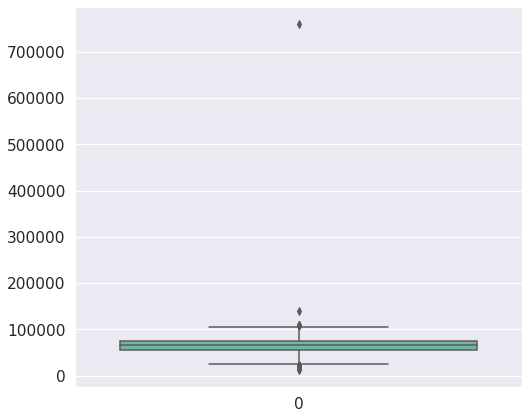

In [ ]:
plt.figure(figsize=(8, 7))
sns.boxplot(data=features_2['Annual brutto salary'].dropna(), palette='Set2');

In [ ]:
new_f = features_2.copy()
factor = 3
upper_lim = new_f['Annual brutto salary'].mean () + new_f['Annual brutto salary'].std () * factor
lower_lim = new_f['Annual brutto salary'].mean () - new_f['Annual brutto salary'].std () * factor
new_f = new_f[(new_f['Annual brutto salary'] < upper_lim) & (new_f['Annual brutto salary'] > lower_lim)]

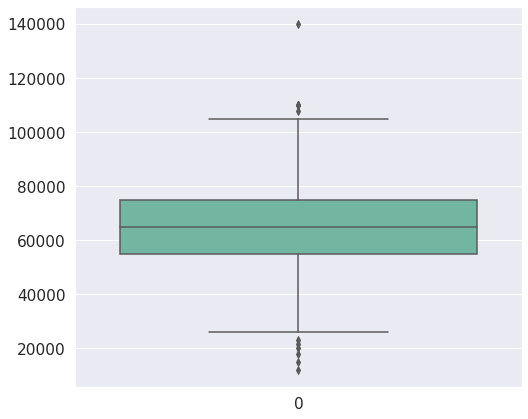

In [ ]:
plt.figure(figsize=(8, 7))
sns.boxplot(data=new_f['Annual brutto salary'].dropna(), palette='Set2');

# Задание 8 (1 балл)
Постройте несколько distplot (с использованием seaborn) для 3ех произвольных числовых признаков.

<Figure size 1080x1080 with 0 Axes>

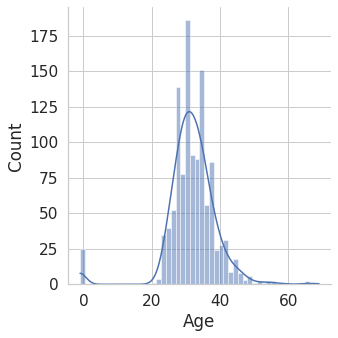

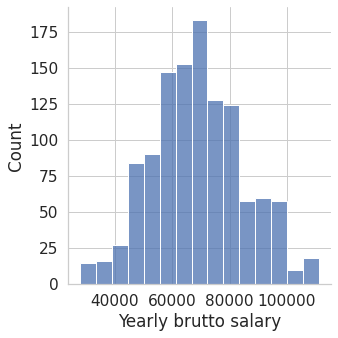

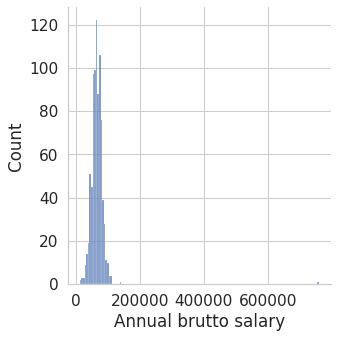

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,15))

sns.displot(features_2['Age'],bins = 50, kde = True)

sns.displot(features_2['Yearly brutto salary'],bins = 15)

sns.displot(features_2['Annual brutto salary'],bins = 150)

plt.show()

# Задание 9 (1.5 балла)
Проведите bivariate analysis: постройте scatter plots различных фичей ( а также фичей с целей переменной). Видите ли вы какие-то зависимости? Может есть гипотезы? Постройте не менее 3ех графиков + краткие выводы по каждому.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x720 with 0 Axes>

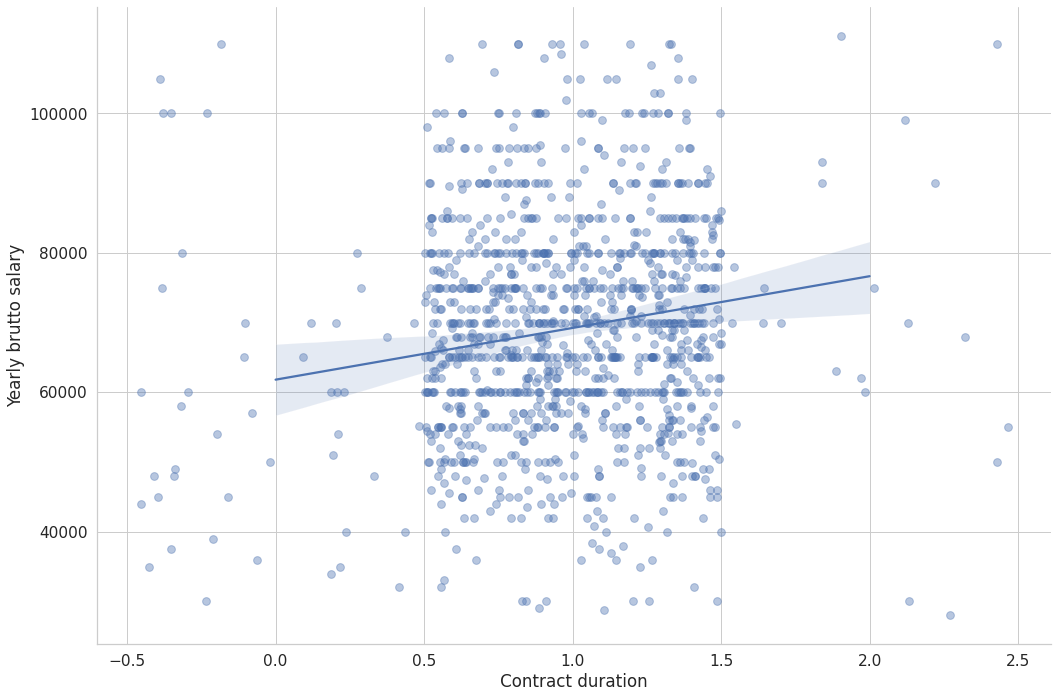

In [ ]:
plt.figure(figsize=(12,10))
#Yearly brutto salary

sns.lmplot('Сontract duration', 'Yearly brutto salary', 
          data = features_3,
          x_jitter=0.5,
          scatter_kws = {'alpha': 0.4, 's': 60}, fit_reg = True,
          size = 10, aspect = 1.5);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x720 with 0 Axes>

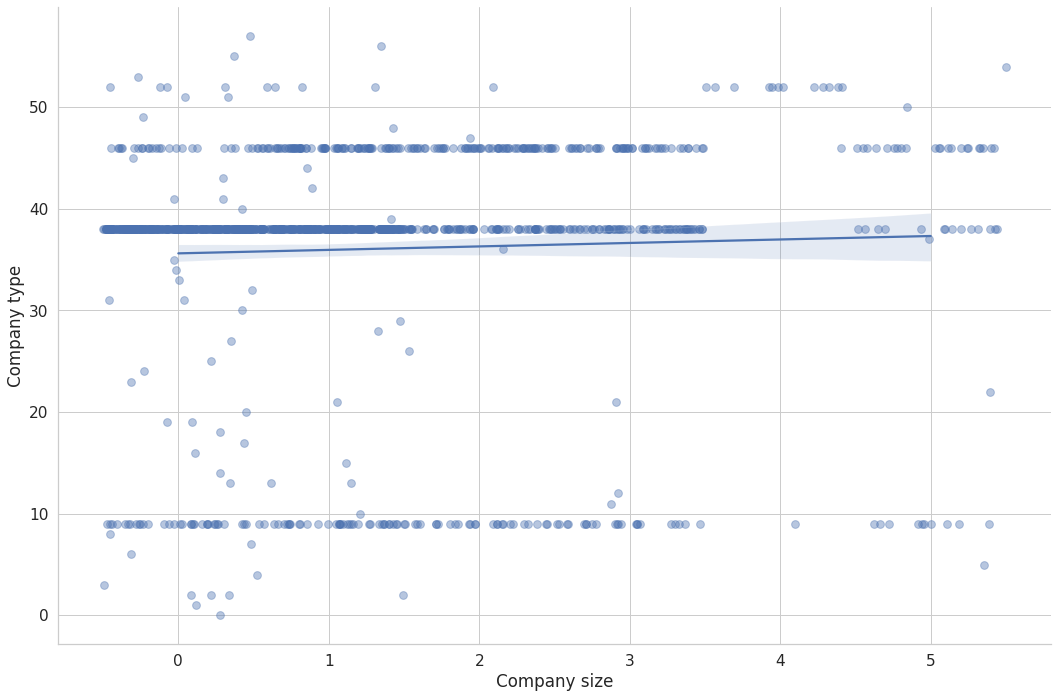

In [ ]:
plt.figure(figsize=(12,10))
#Yearly brutto salary

sns.lmplot('Company size', 'Company type', 
          data = features_3,
          x_jitter=0.5,
          scatter_kws = {'alpha': 0.4, 's': 60}, fit_reg = True,
          size = 10, aspect = 1.5);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x720 with 0 Axes>

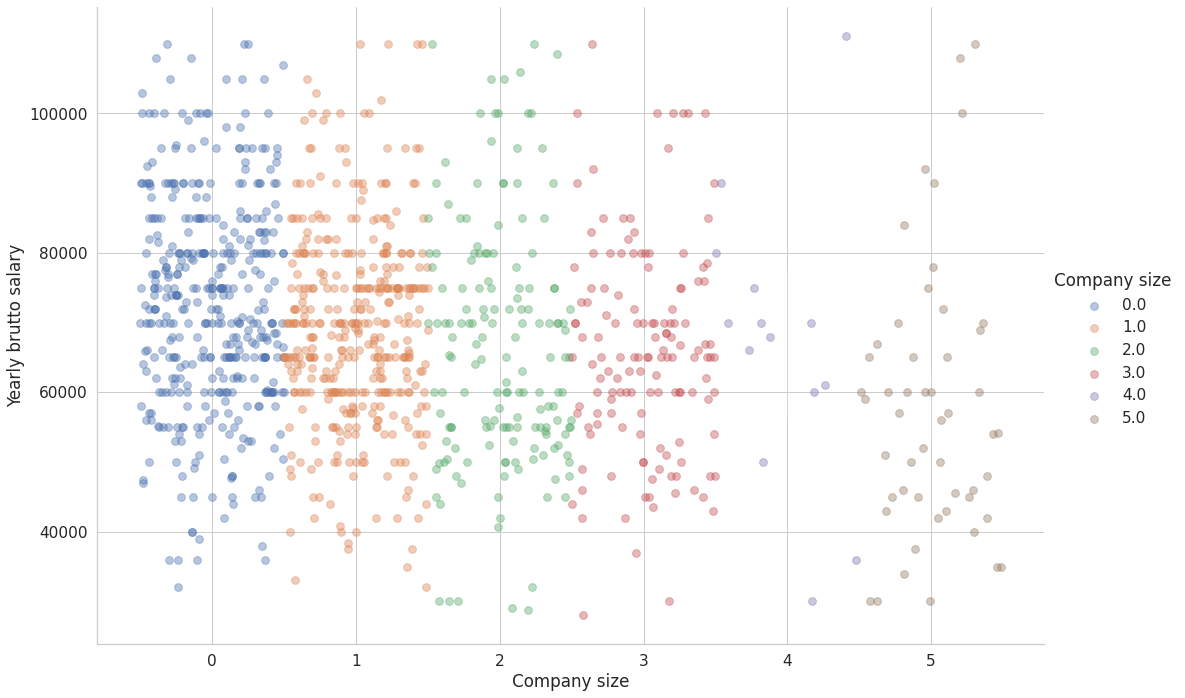

In [ ]:
plt.figure(figsize=(12,10))
#Yearly brutto salary

sns.lmplot('Company size', 'Yearly brutto salary', 
          data = features_3,
           hue='Company size',
          x_jitter=0.5,
          scatter_kws = {'alpha': 0.4, 's': 60}, fit_reg = True,
          size = 10, aspect = 1.5);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x720 with 0 Axes>

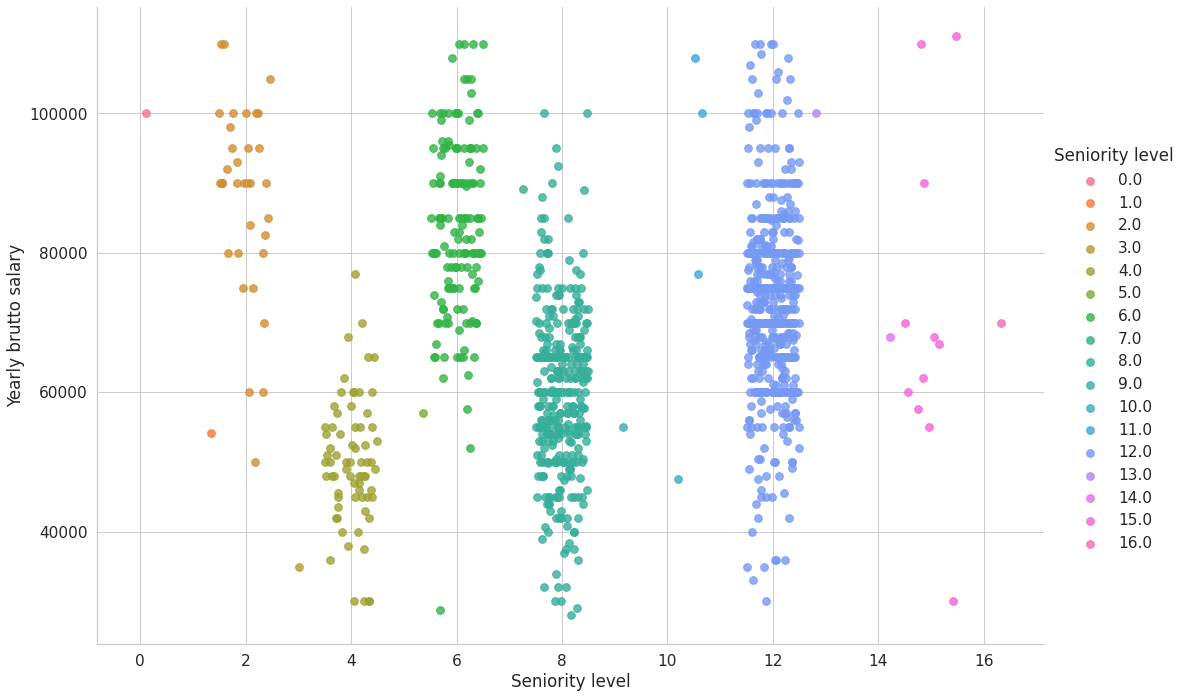

In [ ]:
plt.figure(figsize=(12,10))
#Yearly brutto salary

sns.lmplot('Seniority level', 'Yearly brutto salary', 
          data = features_3,
          hue = 'Seniority level',
          x_jitter=0.5,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = True,
          size = 10, aspect = 1.5);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x720 with 0 Axes>

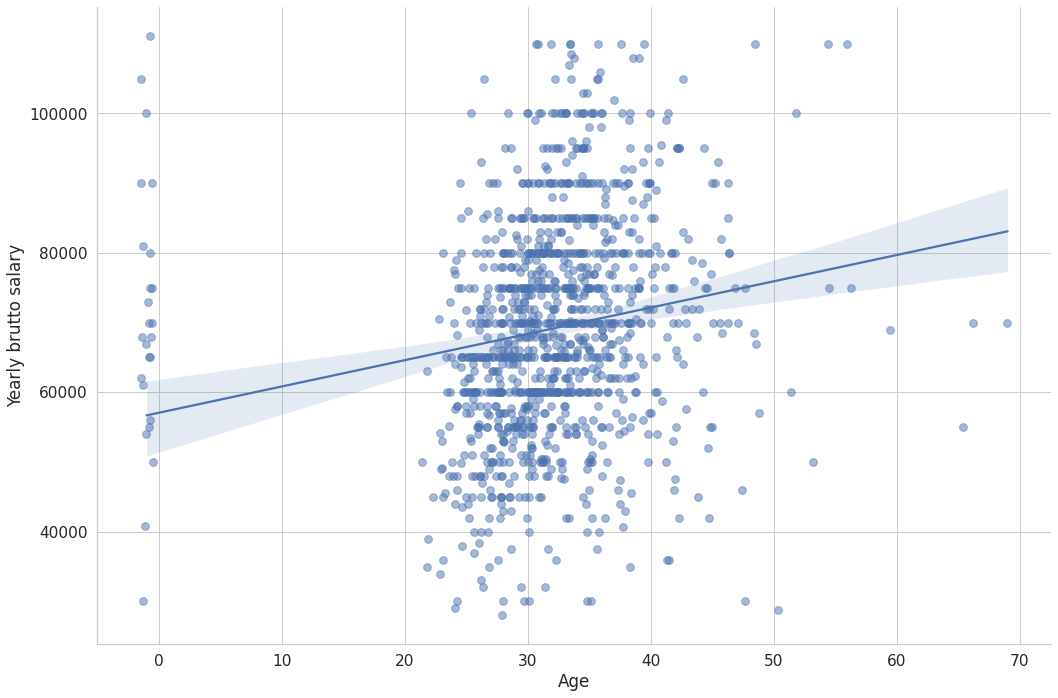

In [ ]:
plt.figure(figsize=(12,10))
#Yearly brutto salary

sns.lmplot('Age', 'Yearly brutto salary', 
          data = features_3,
          x_jitter=0.5,
          scatter_kws = {'alpha': 0.5, 's': 60}, fit_reg = True,
          size = 10, aspect = 1.5);

# Дополнительной задание (необязательно)
Здесь Вы можете выдвинуть различные гипотезы относительно данных: опровергнуть их, подтвердить, ну или хотя бы просто перечислить. Построить дополнительные графики, изменить логику преобразования данных (например, метода заполнения пустых значений), и провести любые другие манипуляции с данными, ведь анализ данных - это чистое творчество!